#Clickbait Detection
Testing the best classifier for clickbait detection



##Import the libraries

In [2]:
!pip install simpletransformers

In [3]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.probability import FreqDist
import string as s
import re
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import matplotlib.pyplot as plt
import seaborn as sns
from simpletransformers.classification import ClassificationModel
import logging
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

##Load the dataset

In [5]:
click=pd.read_csv('/content/gdrive/MyDrive/TextMiningDatasets/clickbait.csv')
click

,Unnamed: 0,text,label
0,0,"Eva Hassett, VP of Savarino Construction Servi...",0
1,1,Kylie Jenner Told Ellen DeGeneres She's Proud ...,1
2,2,Australian rules football: 2010 Gippsland Foot...,0
3,3,Supercross: Stewart wins 4th consecutive Monst...,0
4,4,Wikinews interviews Prince Christopher I of th...,0
...,...,...,...
495,495,"Seth Rogen, Joseph Gordon-Levitt, And Anthony ...",1
496,496,Ruby Rose And Nina Dobrev Are Slated To Join D...,1
497,497,Koizumi has dissolved the Japanese Diet in res...,0
498,498,I Tweeted That Ariana And Frankie Grande Were ...,1


##Drop index column

In [6]:
click= click.drop(click.columns[0], axis=1)
click

,text,label
0,"Eva Hassett, VP of Savarino Construction Servi...",0
1,Kylie Jenner Told Ellen DeGeneres She's Proud ...,1
2,Australian rules football: 2010 Gippsland Foot...,0
3,Supercross: Stewart wins 4th consecutive Monst...,0
4,Wikinews interviews Prince Christopher I of th...,0
...,...,...
495,"Seth Rogen, Joseph Gordon-Levitt, And Anthony ...",1
496,Ruby Rose And Nina Dobrev Are Slated To Join D...,1
497,Koizumi has dissolved the Japanese Diet in res...,0
498,I Tweeted That Ariana And Frankie Grande Were ...,1


##Analyze the dataset

In [7]:
click.dtypes

text     object
label     int64
dtype: object

In [8]:
click.isna().sum()

text     0
label    0
dtype: int64

In [9]:
click['label'].value_counts()

0    250
1    250
Name: label, dtype: int64

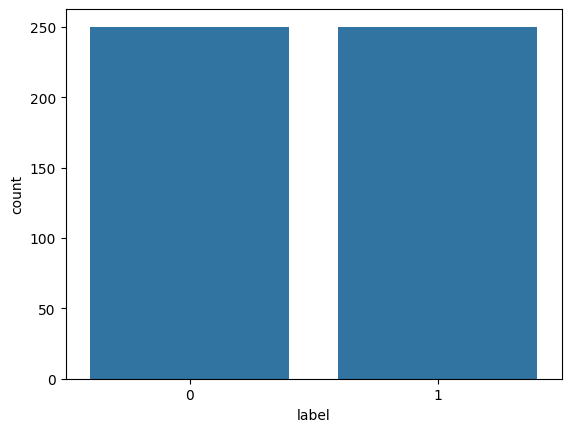

In [10]:
sns.countplot(x ='label', data = click)
plt.show()

##Split into training and testing sets

In [11]:
X=click.text
X

0      Eva Hassett, VP of Savarino Construction Servi...
1      Kylie Jenner Told Ellen DeGeneres She's Proud ...
2      Australian rules football: 2010 Gippsland Foot...
3      Supercross: Stewart wins 4th consecutive Monst...
4      Wikinews interviews Prince Christopher I of th...
                             ...                        
495    Seth Rogen, Joseph Gordon-Levitt, And Anthony ...
496    Ruby Rose And Nina Dobrev Are Slated To Join D...
497    Koizumi has dissolved the Japanese Diet in res...
498    I Tweeted That Ariana And Frankie Grande Were ...
499    A Group Of College Friends Dressed Up As 90s B...
Name: text, Length: 500, dtype: object

In [12]:
Y=click.label
Y

0      0
1      1
2      0
3      0
4      0
      ..
495    1
496    1
497    0
498    1
499    1
Name: label, Length: 500, dtype: int64

##Tokenize

In [13]:
def tokenization(text):
    lst=text.split()
    return lst
X=X.apply(tokenization)
print(X)


0      [Eva, Hassett,, VP, of, Savarino, Construction...
1      [Kylie, Jenner, Told, Ellen, DeGeneres, She's,...
2      [Australian, rules, football:, 2010, Gippsland...
3      [Supercross:, Stewart, wins, 4th, consecutive,...
4      [Wikinews, interviews, Prince, Christopher, I,...
                             ...                        
495    [Seth, Rogen,, Joseph, Gordon-Levitt,, And, An...
496    [Ruby, Rose, And, Nina, Dobrev, Are, Slated, T...
497    [Koizumi, has, dissolved, the, Japanese, Diet,...
498    [I, Tweeted, That, Ariana, And, Frankie, Grand...
499    [A, Group, Of, College, Friends, Dressed, Up, ...
Name: text, Length: 500, dtype: object


##Remove stopwords

In [14]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i.lower() not in stop:
            new_lst.append(i)
    return new_lst
X=X.apply(remove_stopwords)
print(X)

0      [Eva, Hassett,, VP, Savarino, Construction, Se...
1      [Kylie, Jenner, Told, Ellen, DeGeneres, Proud,...
2      [Australian, rules, football:, 2010, Gippsland...
3      [Supercross:, Stewart, wins, 4th, consecutive,...
4      [Wikinews, interviews, Prince, Christopher, Pr...
                             ...                        
495    [Seth, Rogen,, Joseph, Gordon-Levitt,, Anthony...
496    [Ruby, Rose, Nina, Dobrev, Slated, Join, Deepi...
497    [Koizumi, dissolved, Japanese, Diet, response,...
498    [Tweeted, Ariana, Frankie, Grande, "The, New, ...
499    [Group, College, Friends, Dressed, 90s, Bridal...
Name: text, Length: 500, dtype: object


##Convert to lowercase

In [15]:
def lowercase_conversion(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
X=X.apply(lowercase_conversion)
print(X)

0      [eva, hassett,, vp, savarino, construction, se...
1      [kylie, jenner, told, ellen, degeneres, proud,...
2      [australian, rules, football:, 2010, gippsland...
3      [supercross:, stewart, wins, 4th, consecutive,...
4      [wikinews, interviews, prince, christopher, pr...
                             ...                        
495    [seth, rogen,, joseph, gordon-levitt,, anthony...
496    [ruby, rose, nina, dobrev, slated, join, deepi...
497    [koizumi, dissolved, japanese, diet, response,...
498    [tweeted, ariana, frankie, grande, "the, new, ...
499    [group, college, friends, dressed, 90s, bridal...
Name: text, Length: 500, dtype: object


##Remove numbers

In [16]:
def number_removal(lst):
    nonum_lst=[]
    new_lst=[]
    for i in lst:
        for j in s.digits:
            i=i.replace(j,'')
        nonum_lst.append(i)
    for i in nonum_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
X=X.apply(number_removal)
print(X)

0      [eva, hassett,, vp, savarino, construction, se...
1      [kylie, jenner, told, ellen, degeneres, proud,...
2      [australian, rules, football:, gippsland, foot...
3      [supercross:, stewart, wins, th, consecutive, ...
4      [wikinews, interviews, prince, christopher, pr...
                             ...                        
495    [seth, rogen,, joseph, gordon-levitt,, anthony...
496    [ruby, rose, nina, dobrev, slated, join, deepi...
497    [koizumi, dissolved, japanese, diet, response,...
498    [tweeted, ariana, frankie, grande, "the, new, ...
499    [group, college, friends, dressed, s, bridal, ...
Name: text, Length: 500, dtype: object


##Remove punctuation

In [17]:
def remove_punctuation(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
X=X.apply(remove_punctuation)
print(X)

0      [eva, hassett, vp, savarino, construction, ser...
1      [kylie, jenner, told, ellen, degeneres, proud,...
2      [australian, rules, football, gippsland, footb...
3      [supercross, stewart, wins, th, consecutive, m...
4      [wikinews, interviews, prince, christopher, pr...
                             ...                        
495    [seth, rogen, joseph, gordonlevitt, anthony, m...
496    [ruby, rose, nina, dobrev, slated, join, deepi...
497    [koizumi, dissolved, japanese, diet, response,...
498    [tweeted, ariana, frankie, grande, the, new, m...
499    [group, college, friends, dressed, s, bridal, ...
Name: text, Length: 500, dtype: object


##Remove additional space

In [18]:
def remove_space(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst
X=X.apply(remove_space)
print(X)

0      [eva, hassett, vp, savarino, construction, ser...
1      [kylie, jenner, told, ellen, degeneres, proud,...
2      [australian, rules, football, gippsland, footb...
3      [supercross, stewart, wins, th, consecutive, m...
4      [wikinews, interviews, prince, christopher, pr...
                             ...                        
495    [seth, rogen, joseph, gordonlevitt, anthony, m...
496    [ruby, rose, nina, dobrev, slated, join, deepi...
497    [koizumi, dissolved, japanese, diet, response,...
498    [tweeted, ariana, frankie, grande, the, new, m...
499    [group, college, friends, dressed, s, bridal, ...
Name: text, Length: 500, dtype: object


##Lemmatize

In [19]:
lemmatizer = WordNetLemmatizer()

def lemmatize(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
X=X.apply(lemmatize)
print(X)

0      [eva, hassett, vp, savarino, construction, ser...
1      [kylie, jenner, told, ellen, degeneres, proud,...
2      [australian, rule, football, gippsland, footba...
3      [supercross, stewart, win, th, consecutive, mo...
4      [wikinews, interview, prince, christopher, pri...
                             ...                        
495    [seth, rogen, joseph, gordonlevitt, anthony, m...
496    [ruby, rose, nina, dobrev, slated, join, deepi...
497    [koizumi, dissolved, japanese, diet, response,...
498    [tweeted, ariana, frankie, grande, the, new, m...
499    [group, college, friend, dressed, s, bridal, p...
Name: text, Length: 500, dtype: object


In [20]:
X= X.apply(lemmatize).apply(lambda x: ' '.join(x))
print(X)

0      eva hassett vp savarino construction service c...
1      kylie jenner told ellen degeneres proud caitly...
2      australian rule football gippsland football le...
3      supercross stewart win th consecutive monster ...
4      wikinews interview prince christopher principa...
                             ...                        
495    seth rogen joseph gordonlevitt anthony mackie ...
496    ruby rose nina dobrev slated join deepika padu...
497    koizumi dissolved japanese diet response rejec...
498    tweeted ariana frankie grande the new michael ...
499    group college friend dressed s bridal party ha...
Name: text, Length: 500, dtype: object


##Apply Countvectorizer

In [21]:
cov=CountVectorizer(analyzer='word', ngram_range=(1,2),max_features=22500)
X=cov.fit_transform(X)

In [22]:
X=X.toarray()

In [23]:
feature_names = cov.get_feature_names_out()

pd.DataFrame(X, columns=feature_names)

,aaevpc,aaevpc candidate,abc,abc apologised,abel,abel prize,absolute,absolute wrong,absolutely,absolutely stunning,...,zero feel,zero honored,zisser,zisser majid,zodiac,zodiac sign,zoolander,zoolander dropped,zuckerberg,zuckerberg victim
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Multinomial Naive Bayes

In [ ]:
repeats=30
accuracies=[]
fscore=[]

for i in range(0, repeats):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=click['label'])

  mnb=MultinomialNB()
  mnb.fit(X_train, y_train)

  y_pred=mnb.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))
  fscore.append(f1_score(y_test, y_pred, pos_label=1))

print(accuracies)
print(fscore)

[0.952, 0.896, 0.952, 0.912, 0.896, 0.904, 0.928, 0.944, 0.888, 0.904, 0.912, 0.92, 0.952, 0.936, 0.96, 0.904, 0.96, 0.92, 0.904, 0.96, 0.896, 0.928, 0.928, 0.96, 0.928, 0.952, 0.928, 0.944, 0.936, 0.944]
[0.9538461538461539, 0.900763358778626, 0.9523809523809523, 0.9172932330827068, 0.9037037037037038, 0.9104477611940299, 0.9302325581395349, 0.9448818897637796, 0.8939393939393939, 0.9076923076923077, 0.916030534351145, 0.923076923076923, 0.953125, 0.9384615384615386, 0.9606299212598425, 0.9047619047619047, 0.96, 0.9242424242424242, 0.90625, 0.9606299212598425, 0.8992248062015503, 0.9333333333333333, 0.9312977099236642, 0.9606299212598426, 0.9323308270676691, 0.9531249999999999, 0.930232558139535, 0.9457364341085271, 0.9393939393939393, 0.9457364341085271]


In [ ]:
print('Mean accuracy', np.mean(accuracies))
print("Standard deviation", np.std(accuracies))
print("F1-score", np.mean(fscore))
cm=confusion_matrix(y_test, y_pred)


Mean accuracy 0.9282666666666665
Standard deviation 0.022293397129095296
F1-score 0.9311143481157134


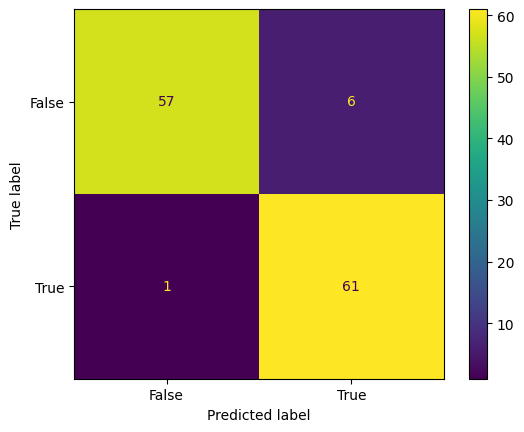

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

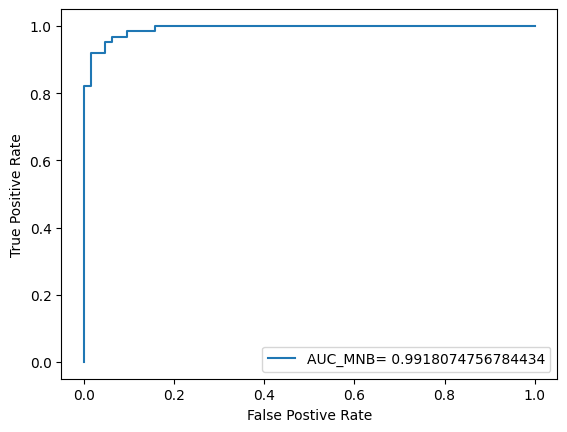

In [ ]:
dy_pred_prob=mnb.predict_proba(X_test)[::, 1]
fpr, tpr, _=roc_curve(y_test, dy_pred_prob)
auc=roc_auc_score(y_test, dy_pred_prob)

plt.plot(fpr, tpr, label="AUC_MNB= "+ str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Postive Rate')
plt.legend(loc=4)
plt.show()

##Logistic Regression

In [ ]:
repeats=30
accuracies=[]
fscore=[]

for i in range(0, repeats):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=click['label'])

  lr=LogisticRegression()
  lr.fit(X_train, y_train)

  y_pred=lr.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))
  fscore.append(f1_score(y_test, y_pred, pos_label=1))

print(accuracies)
print(fscore)

[0.928, 0.928, 0.92, 0.92, 0.864, 0.952, 0.928, 0.936, 0.896, 0.92, 0.904, 0.944, 0.88, 0.952, 0.928, 0.888, 0.952, 0.928, 0.904, 0.976, 0.856, 0.88, 0.952, 0.936, 0.944, 0.952, 0.936, 0.904, 0.912, 0.92]
[0.9279999999999999, 0.9279999999999999, 0.9242424242424242, 0.921875, 0.8776978417266188, 0.9538461538461538, 0.930232558139535, 0.9375, 0.8992248062015504, 0.9242424242424243, 0.9076923076923077, 0.9457364341085271, 0.888888888888889, 0.9516129032258065, 0.9291338582677167, 0.8955223880597015, 0.9523809523809523, 0.9302325581395349, 0.909090909090909, 0.9763779527559054, 0.8714285714285714, 0.8920863309352517, 0.953125, 0.9384615384615386, 0.9465648854961831, 0.9531249999999999, 0.9393939393939393, 0.9076923076923077, 0.9172932330827068, 0.9264705882352942]


In [ ]:
print('Mean accuracy', np.mean(accuracies))
print("Standard deviation", np.std(accuracies))
print("F1-score", np.mean(fscore))
cm=confusion_matrix(y_test, y_pred)

Mean accuracy 0.9213333333333332
Standard deviation 0.027872726613822486
F1-score 0.9252390585244915


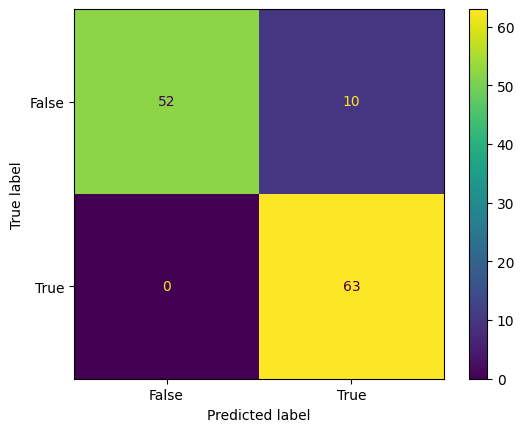

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

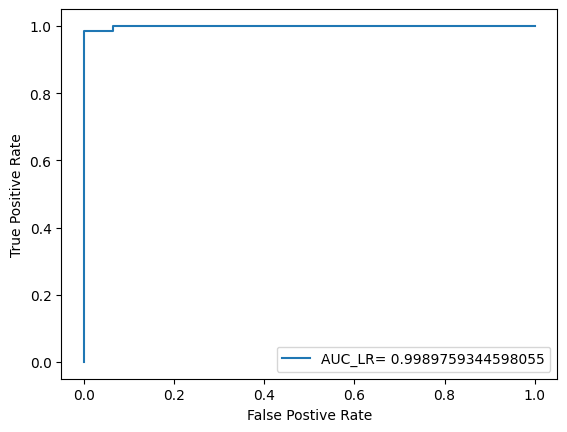

In [ ]:
dy_pred_prob=lr.predict_proba(X_test)[::, 1]
fpr, tpr, _=roc_curve(y_test, dy_pred_prob)
auc=roc_auc_score(y_test, dy_pred_prob)

plt.plot(fpr, tpr, label="AUC_LR= "+ str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Postive Rate')
plt.legend(loc=4)
plt.show()

##Support Vector Machines

In [ ]:
repeats=30
accuracies=[]
fscore=[]

for i in range(0, repeats):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=click['label'])

  svm=SVC(probability=True)
  svm.fit(X_train, y_train)

  y_pred=svm.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))
  fscore.append(f1_score(y_test, y_pred, pos_label=1))

print(accuracies)
print(fscore)

[0.792, 0.792, 0.856, 0.808, 0.872, 0.816, 0.872, 0.84, 0.824, 0.816, 0.808, 0.84, 0.84, 0.848, 0.84, 0.832, 0.872, 0.848, 0.864, 0.832, 0.832, 0.808, 0.84, 0.88, 0.864, 0.8, 0.808, 0.784, 0.888, 0.848]
[0.8142857142857143, 0.8169014084507041, 0.8636363636363636, 0.8260869565217391, 0.8787878787878787, 0.8160000000000001, 0.8805970149253732, 0.8529411764705881, 0.835820895522388, 0.8130081300813008, 0.8260869565217391, 0.8412698412698413, 0.8507462686567164, 0.857142857142857, 0.8484848484848485, 0.8372093023255814, 0.8787878787878787, 0.8613138686131387, 0.8721804511278196, 0.8396946564885497, 0.8467153284671532, 0.8095238095238094, 0.8412698412698412, 0.887218045112782, 0.8661417322834646, 0.8275862068965517, 0.8153846153846154, 0.7906976744186047, 0.8939393939393939, 0.857142857142857]


In [ ]:
print('Mean accuracy', np.mean(accuracies))
print("Standard deviation", np.std(accuracies))
print("F1-score", np.mean(fscore))
cm=confusion_matrix(y_test, y_pred)

Mean accuracy 0.8354666666666668
Standard deviation 0.02768842517892428
F1-score 0.8448867324180032


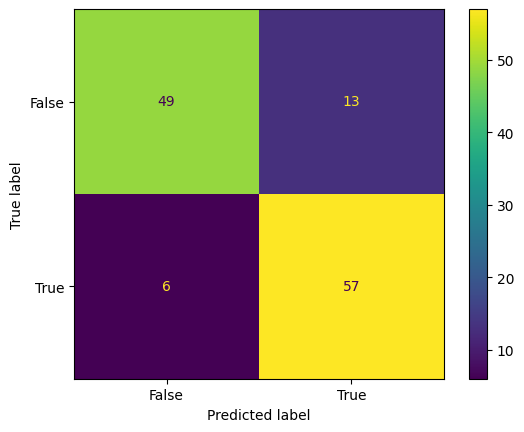

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

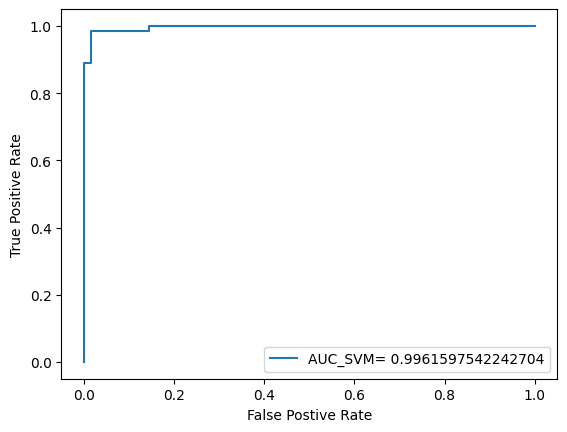

In [ ]:
dy_pred_prob=svm.predict_proba(X_test)[::, 1]
fpr, tpr, _=roc_curve(y_test, dy_pred_prob)
auc=roc_auc_score(y_test, dy_pred_prob)

plt.plot(fpr, tpr, label="AUC_SVM= "+ str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Postive Rate')
plt.legend(loc=4)
plt.show()

##k-Nearest Neighbours

In [ ]:
repeats=30
accuracies=[]
fscore=[]

for i in range(0, repeats):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=click['label'])

  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train, y_train)

  y_pred=knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))
  fscore.append(f1_score(y_test, y_pred, pos_label=1))

print(accuracies)
print(fscore)

[0.544, 0.568, 0.56, 0.6, 0.552, 0.568, 0.552, 0.56, 0.536, 0.552, 0.536, 0.536, 0.56, 0.536, 0.536, 0.544, 0.544, 0.552, 0.552, 0.56, 0.552, 0.552, 0.512, 0.552, 0.544, 0.56, 0.552, 0.568, 0.552, 0.536]
[0.6850828729281768, 0.7000000000000001, 0.6927374301675978, 0.7159090909090909, 0.6923076923076924, 0.6966292134831461, 0.688888888888889, 0.6927374301675978, 0.6813186813186815, 0.688888888888889, 0.6847826086956522, 0.6847826086956522, 0.6927374301675978, 0.6813186813186815, 0.6847826086956522, 0.6850828729281768, 0.6885245901639345, 0.6923076923076924, 0.6923076923076924, 0.6927374301675978, 0.6923076923076924, 0.6923076923076924, 0.6702702702702703, 0.6923076923076924, 0.6850828729281768, 0.696132596685083, 0.688888888888889, 0.6966292134831461, 0.6923076923076924, 0.6847826086956522]


In [ ]:
print('Mean accuracy', np.mean(accuracies))
print("Standard deviation", np.std(accuracies))
print("F1-score", np.mean(fscore))
cm=confusion_matrix(y_test, y_pred)

Mean accuracy 0.5509333333333334
Standard deviation 0.014999851851120238
F1-score 0.6901627208230027


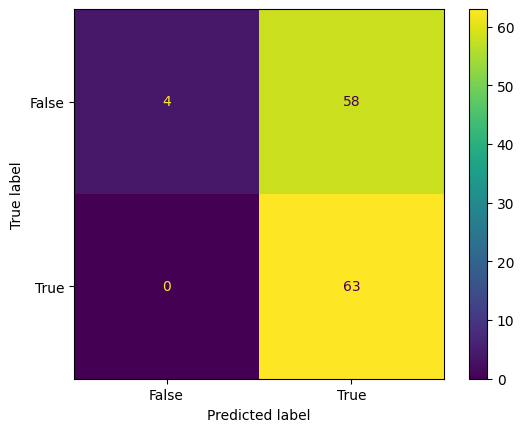

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

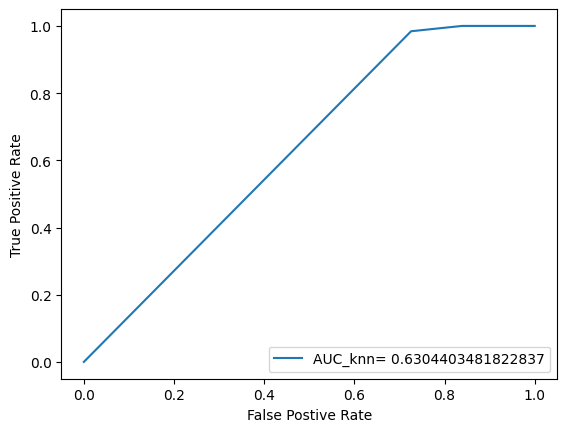

In [ ]:
dy_pred_prob=knn.predict_proba(X_test)[::, 1]
fpr, tpr, _=roc_curve(y_test, dy_pred_prob)
auc=roc_auc_score(y_test, dy_pred_prob)

plt.plot(fpr, tpr, label="AUC_knn= "+ str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Postive Rate')
plt.legend(loc=4)
plt.show()

##Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=click['label'])

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Test Accuracy: 0.928


In [ ]:
repeats = 30
accuracies = []
fscores = []

for i in range(repeats):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=click['label'])
    random_forest = RandomForestClassifier(n_estimators=150, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=10)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fscore = f1_score(y_test, y_pred, pos_label=1)
    accuracies.append(accuracy)
    fscores.append(fscore)

print("Accuracies:", accuracies)
print("F-scores:", fscores)

Accuracies: [0.92, 0.912, 0.928, 0.808, 0.88, 0.872, 0.904, 0.888, 0.84, 0.856, 0.808, 0.896, 0.888, 0.864, 0.864, 0.928, 0.856, 0.88, 0.92, 0.856, 0.92, 0.872, 0.856, 0.832, 0.856, 0.904, 0.92, 0.872, 0.832, 0.872]
F-scores: [0.923076923076923, 0.9172932330827068, 0.9279999999999999, 0.8378378378378377, 0.8854961832061068, 0.8787878787878787, 0.90625, 0.8955223880597015, 0.855072463768116, 0.8695652173913043, 0.8356164383561643, 0.8992248062015504, 0.8939393939393939, 0.874074074074074, 0.8794326241134751, 0.9279999999999999, 0.8732394366197184, 0.888888888888889, 0.923076923076923, 0.8695652173913043, 0.9218749999999999, 0.875, 0.8636363636363636, 0.851063829787234, 0.8714285714285714, 0.9104477611940299, 0.923076923076923, 0.8787878787878788, 0.8421052631578947, 0.8857142857142857]


In [ ]:
print('Mean accuracy', np.mean(accuracies))
print("Standard deviation", np.std(accuracies))
print("F1-score", np.mean(fscore))
cm=confusion_matrix(y_test, y_pred)

Mean accuracy 0.8768000000000001
Standard deviation 0.033408980828513776
F1-score 0.8857142857142857


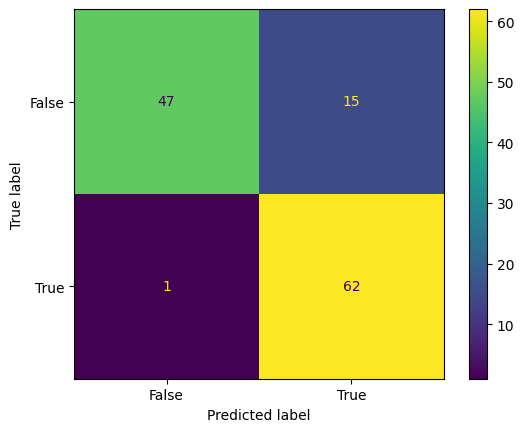

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

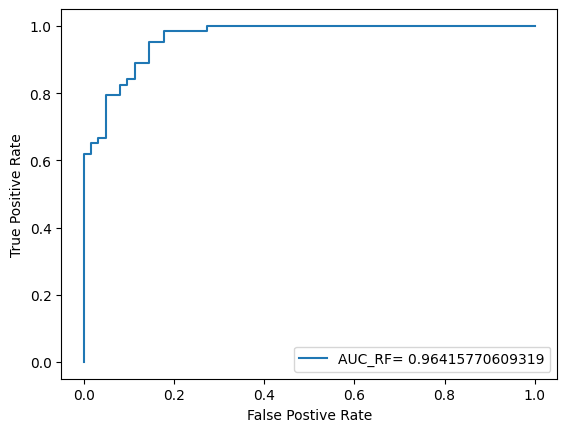

In [ ]:
dy_pred_prob=random_forest.predict_proba(X_test)[::, 1]
fpr, tpr, _=roc_curve(y_test, dy_pred_prob)
auc=roc_auc_score(y_test, dy_pred_prob)

plt.plot(fpr, tpr, label="AUC_RF= "+ str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Postive Rate')
plt.legend(loc=4)
plt.show()

##Gradient Boosting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=click['label'])

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Test Accuracy: 0.88


In [ ]:
repeats = 30
accuracies = []
fscores = []

for i in range(repeats):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=click['label'])
    xgb = GradientBoostingClassifier(n_estimators=50, subsample=0.8, min_samples_split=2, min_samples_leaf=2, max_depth=7, learning_rate=0.2)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fscore = f1_score(y_test, y_pred, pos_label=1)
    accuracies.append(accuracy)
    fscores.append(fscore)

print("Accuracies:", accuracies)
print("F-scores:", fscores)

Accuracies: [0.776, 0.808, 0.816, 0.816, 0.824, 0.816, 0.872, 0.864, 0.816, 0.88, 0.816, 0.84, 0.816, 0.824, 0.768, 0.848, 0.816, 0.816, 0.832, 0.808, 0.832, 0.856, 0.808, 0.784, 0.8, 0.816, 0.792, 0.776, 0.8, 0.824]
F-scores: [0.7407407407407407, 0.7894736842105262, 0.8345323741007193, 0.8270676691729324, 0.835820895522388, 0.832116788321168, 0.875, 0.8702290076335878, 0.8296296296296296, 0.887218045112782, 0.7964601769911503, 0.8571428571428571, 0.832116788321168, 0.8405797101449276, 0.7883211678832117, 0.8613138686131386, 0.832116788321168, 0.8296296296296296, 0.8531468531468532, 0.8356164383561644, 0.8073394495412844, 0.859375, 0.8333333333333334, 0.8187919463087249, 0.8251748251748251, 0.8391608391608391, 0.7636363636363636, 0.8055555555555556, 0.8251748251748251, 0.842857142857143]


In [ ]:
print('Mean accuracy', np.mean(accuracies))
print("Standard deviation", np.std(accuracies))
print("F1-score", np.mean(fscore))
cm=confusion_matrix(y_test, y_pred)

Mean accuracy 0.8186666666666669
Standard deviation 0.026479342052920327
F1-score 0.842857142857143


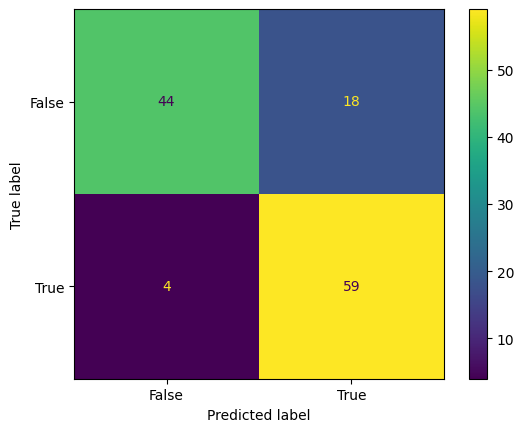

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

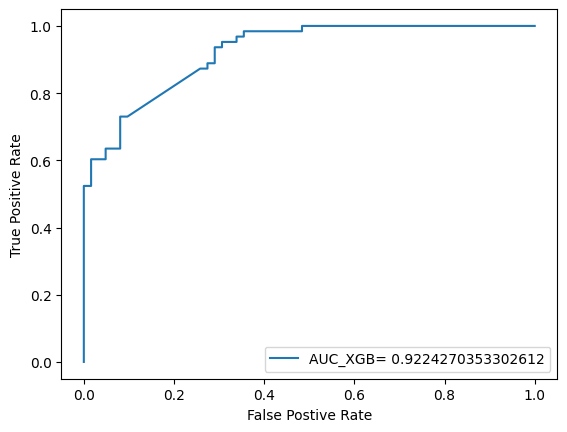

In [ ]:
dy_pred_prob=xgb.predict_proba(X_test)[::, 1]
fpr, tpr, _=roc_curve(y_test, dy_pred_prob)
auc=roc_auc_score(y_test, dy_pred_prob)

plt.plot(fpr, tpr, label="AUC_XGB= "+ str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Postive Rate')
plt.legend(loc=4)
plt.show()

##Simple Transformers Classifier

In [ ]:
click_train=click.iloc[:376, :]
click_train

,text,label
0,"Eva Hassett, VP of Savarino Construction Servi...",0
1,Kylie Jenner Told Ellen DeGeneres She's Proud ...,1
2,Australian rules football: 2010 Gippsland Foot...,0
3,Supercross: Stewart wins 4th consecutive Monst...,0
4,Wikinews interviews Prince Christopher I of th...,0
...,...,...
371,"Billy On The Street Talks Pizza Rat Being Gay,...",1
372,Wikinews interviews Zahra Stardust about the u...,0
373,Vogue's December Cover Features Bollywood Diva...,1
374,University of Missouri Hospital in lockdown af...,0


In [ ]:
click_train.columns = ["text", "labels"]
click_train

,text,labels
0,"Eva Hassett, VP of Savarino Construction Servi...",0
1,Kylie Jenner Told Ellen DeGeneres She's Proud ...,1
2,Australian rules football: 2010 Gippsland Foot...,0
3,Supercross: Stewart wins 4th consecutive Monst...,0
4,Wikinews interviews Prince Christopher I of th...,0
...,...,...
371,"Billy On The Street Talks Pizza Rat Being Gay,...",1
372,Wikinews interviews Zahra Stardust about the u...,0
373,Vogue's December Cover Features Bollywood Diva...,1
374,University of Missouri Hospital in lockdown af...,0


In [ ]:
click_test=click.iloc[376:, :]
click_test

,text,label
376,Jennifer Lawrence's New Movie Is Basically Jus...,1
377,Award winning singer George Michael cautioned ...,0
378,A Bride Says She's Outraged After She Missed P...,1
379,This 11-Year-Old Girl Started A Project Called...,1
380,Crisis at stricken Japan nuclear plant escalat...,0
...,...,...
495,"Seth Rogen, Joseph Gordon-Levitt, And Anthony ...",1
496,Ruby Rose And Nina Dobrev Are Slated To Join D...,1
497,Koizumi has dissolved the Japanese Diet in res...,0
498,I Tweeted That Ariana And Frankie Grande Were ...,1


In [ ]:
model = ClassificationModel('roberta', 'roberta-base', use_cuda=False, args={'reprocess_input_data': True, 'overwrite_output_dir': True})
model.train_model(click_train)
result, model_outputs, wrong_predictions = model.eval_model(click_test, acc=accuracy_score)

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

  0%|          | 0/376 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/47 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/124 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
print(result)

{'mcc': 1.0, 'tp': 65, 'tn': 59, 'fp': 0, 'fn': 0, 'auroc': 1.0, 'auprc': 0.9999999999999998, 'acc': 1.0, 'eval_loss': 0.0012133220880059525}


In [ ]:
n=5
kf = KFold(n_splits=n, shuffle=True)
results = []

for train_index, val_index in kf.split(click_train):
    click_train=click.iloc[:376, :]
    click_train.columns = ["text", "labels"]
    click_test=click.iloc[376:, :]

    model = ClassificationModel('bert', 'bert-base-uncased', use_cuda=False, args={'reprocess_input_data': True, 'overwrite_output_dir': True})
    model.train_model(click_train)
    result, model_outputs, wrong_predictions = model.eval_model(click_test, acc=accuracy_score)
    print(result['acc'])
    results.append(result['acc'])
print(results)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/376 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/47 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/124 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/16 [00:00<?, ?it/s]

0.9919354838709677


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/376 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/47 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/124 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/16 [00:00<?, ?it/s]

0.9919354838709677


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/376 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/47 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/124 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/16 [00:00<?, ?it/s]

0.9919354838709677


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/376 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/47 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/124 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/16 [00:00<?, ?it/s]

0.9919354838709677


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/376 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/47 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/124 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/16 [00:00<?, ?it/s]

1.0
[0.9919354838709677, 0.9919354838709677, 0.9919354838709677, 0.9919354838709677, 1.0]


In [ ]:
print("Mean accuracy:", np.mean(results))

Mean accuracy: 0.9935483870967742


##LSTM

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
text = click['text'].values
labels = click['label'].values
X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.25, shuffle=True, stratify=click['label'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(375,) (125,) (375,) (125,)


In [ ]:
vocab_size = 5000
maxlen = 300
embedding_size = 32

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text)

X_train = tokenizer.texts_to_sequences(X_train)
x_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 32

X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

embedding_size = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_padded, y_train, batch_size=32, validation_data=(X_test_padded, y_test), epochs=12)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 32, 100)           258400    
                                                                 
 lstm_15 (LSTM)              (None, 32, 32)            17024     
                                                                 
 global_max_pooling1d_15 (G  (None, 32)                0         
 lobalMaxPooling1D)                                              
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 275457 (1.05 MB)
Trainable params: 275457 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

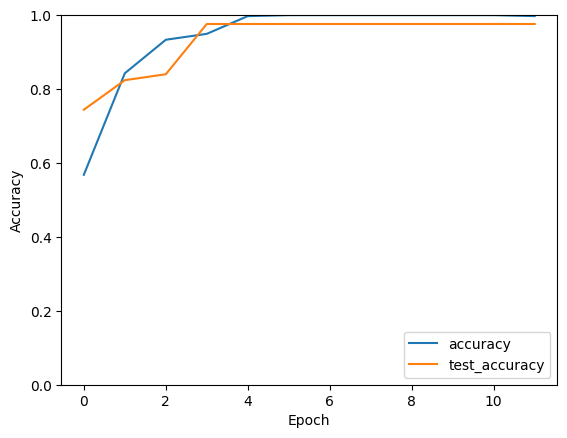

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

##Testing more simple transformers

In [ ]:
import torch
cuda_available = torch.cuda.is_available()

In [ ]:
model = ClassificationModel('electra', 'google/electra-base-discriminator', use_cuda=cuda_available, args={'reprocess_input_data': True, 'overwrite_output_dir': True})
model.train_model(click_train)
result, model_outputs, wrong_predictions = model.eval_model(click_test, acc=accuracy_score)

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/376 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/47 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/124 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
print(result)

{'mcc': 0.9839492556263575, 'tp': 65, 'tn': 58, 'fp': 1, 'fn': 0, 'auroc': 1.0, 'auprc': 0.9999999999999996, 'acc': 0.9919354838709677, 'eval_loss': 0.04032351227942854}


In [ ]:
n = 5
kf = KFold(n_splits=n, shuffle=True)
results = []

for train_index, val_index in kf.split(click):
    click_train = click.iloc[train_index, :]
    click_val = click.iloc[val_index, :]
    click_train.columns = ["text", "labels"]
    click_val.columns = ["text", "labels"]
    model = ClassificationModel('bert', 'bert-base-uncased', use_cuda=False, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs': 3})
    model.train_model(click_train)
    result, _, _ = model.eval_model(click_val, acc=accuracy_score)
    print(result['acc'])
    results.append(result['acc'])

print(results)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

0.99


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

1.0


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

1.0


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

1.0


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

1.0
[0.99, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print("Mean accuracy with 3 epochs:", np.mean(results))

Mean accuracy with 3 epochs: 0.998


In [ ]:
n = 5
kf = KFold(n_splits=n, shuffle=True)
results = []

for train_index, val_index in kf.split(click):
    click_train = click.iloc[train_index, :]
    click_val = click.iloc[val_index, :]
    click_train.columns = ["text", "labels"]
    click_val.columns = ["text", "labels"]
    model = ClassificationModel('roberta', 'roberta-base', use_cuda=False, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs': 3})
    model.train_model(click_train)
    result, _, _ = model.eval_model(click_val, acc=accuracy_score)
    print(result['acc'])
    results.append(result['acc'])

print(results)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

0.99


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

1.0


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

0.99


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

1.0


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

1.0
[0.99, 1.0, 0.99, 1.0, 1.0]


In [ ]:
print(result)

{'mcc': 1.0, 'tp': 50, 'tn': 50, 'fp': 0, 'fn': 0, 'auroc': 1.0, 'auprc': 1.0, 'acc': 1.0, 'eval_loss': 0.00015084044627236345}
